In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd
from pydub import AudioSegment
from itertools import cycle
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


C:\Users\Mykola\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Pridanie potrebných knižníc a definovanie štýlu farieb

In [3]:
def echoFF(x,Fs,dTime,b):
    dSamples = math.ceil(dTime * Fs) # oneskorenie vo vzorkach
    Nx = len(x) - 1
    Ny = Nx + dSamples
    l = np.zeros((Ny,1)) 
    y = l.flatten()
    for n in range(Ny):
        if n < dSamples + 1:
            y[n] = x[n] # prvych dSamples vzoriek vystupu kopiruje vstup
        elif n > Nx:
            y[n] = b * x[n - dSamples] # poslednych dSamples vzoriek je len oneskoreny vstup          
        else:
            y[n] = x[n] + b * x[n - dSamples]# na vystupe sa scita vstup a oneskoreny vstup           
    return y 

Táto funkcia echoFF prijíma ako vstup zvukový signál x, vzorkovaciu frekvenciu Fs, čas oneskorenia dTime a faktor tlmenia/posunu b a vracia nový zvukový signál y, ktorý je efektom ozveny na vstupný signál.

In [9]:
x, Fs = librosa.load("../Mykola/bakalarka/sounds02/Kick.wav") # cesta na .wav file 

# Oneskorenie ( >= 30 msec )
dSec = 0.35;

# Zosilnenie oneskorovacej vetvy 
b = 0.3;

y = echoFF(x,Fs,dSec,b);


Posledná časť kódu volá funkciu echoFF a odovzdáva jej parametre x (vstupný signál), Fs (vzorkovacia frekvencia), dSec (trvanie oneskorenia) a b (koeficient oneskorenia). Výsledkom je oneskorený výstupný signál y.

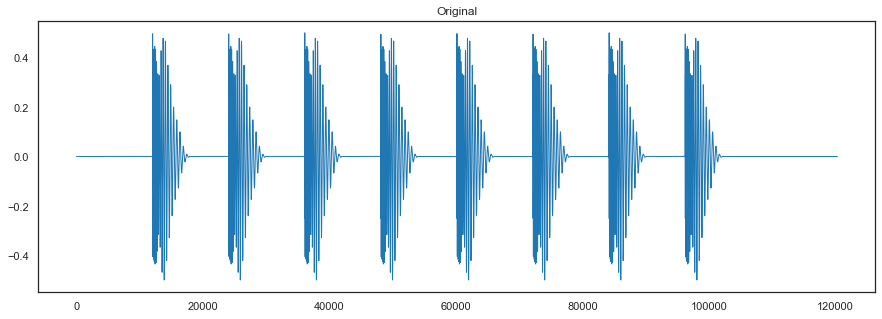

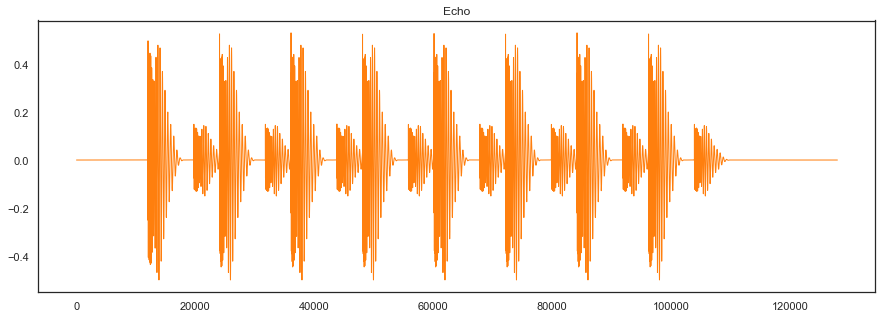

In [10]:
pd.Series(x).plot(figsize=(15,5),
                  lw=1,
                  title='Original',
                  color=color_pal[0])

plt.show()
pd.Series(y).plot(figsize=(15,5),
                  lw=1,
                  title='Echo',
                  color=color_pal[1])

plt.show()


Prvý graf zobrazí pôvodný signál x, ktorý sa vykreslí pomocou pd.Series(x).plot.
Druhý graf zobrazí zvukový signál y, ktorý bude vytvorený pomocou echoFF(x,Fs,dSec,b).